In [8]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 160

# A измерение динамической постоянной $I = U_{0} \frac{R_1}{R_2} \frac{1}{R + R_{0}}$

C_i(динамическая постоянная) = 2.1596557047682544e-09


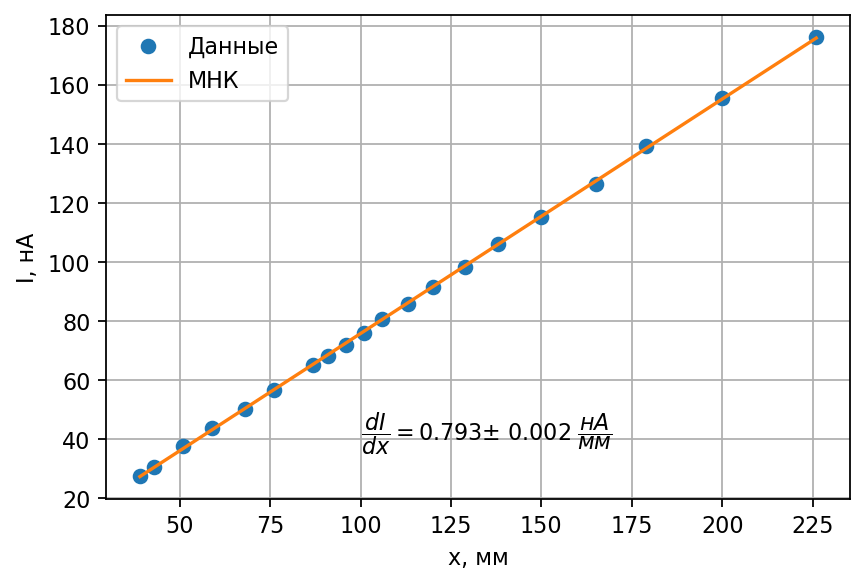

In [9]:
def line(x, a, b):
    return a * x + b

x = np.array([226, 200, 179, 165, 150, 138, 129, 120, 113, 106, 101, 96, 91, 87, 76, 68, 59, 51, 43, 39], dtype=np.float64)
R = np.array([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 26, 30, 35, 43, 48], dtype=np.float64)

R *= 1000

U_0 = 67.0 * 3.0 / 150.0
R_0 = 610.0
R1_R2 = 1/1000
I = U_0 * R1_R2 / (R_0 + R)
I *= 1e9                   #I - нА

plt.plot(x, I, 'o', label='Данные')
plt.grid()
plt.xlabel(r'x, мм')
plt.ylabel(r'I, нA')
#plt.errorbar(x, I, xerr=1, yerr=0, fmt='.k')

popt, pcov = curve_fit(line, x, I)
plt.plot(x, line(x, *popt), label='МНК')
plt.legend()
plt.text(100, 40, r'$\dfrac{dI}{dx} = $'+str(int(popt[0] * 1000)/1000)+r'$\pm$'+ r' $0.002\; \dfrac{нА}{мм}$')


print('C_i(динамическая постоянная) = ' + str(2 * 1.36 * popt[0] * 1e-9))

plt.savefig('dI\dx.png')

# Б определение критического сопротивления

theta_0 = 0.1970044541737071
theta disp = 0.008356120443860212


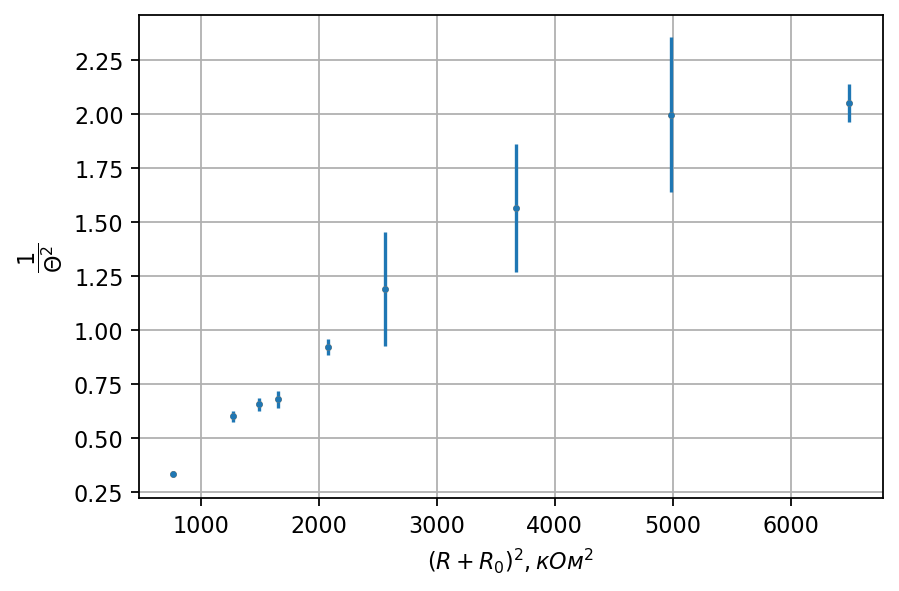

In [10]:
# Осталось посчитать сигма отдельного, посчитать массив сигм(кресты ошибок) и затем Хи-квадрат

def get_disp(aver, arr):
    if len(arr) == 1:
        return 0.0
    ans = 0.0
    for i in arr:
        ans += (i - aver)**2
    #return np.sqrt(ans/(len(arr)) )
    return np.sqrt(ans/( len(arr)*(len(arr)-1) ))

def get_tool(A, B):
    a = (A + 1)/(B - 1)
    b = (A - 1)/(B + 1)
    a = np.log(a)
    b = np.log(b)
    return np.absolute((1/a**2 - 1/b**2) / 2)

theta_0 = np.array([187/152, 184/152, 145/120, 90/72, 50/42], dtype=np.float64)
theta_0 = np.log(theta_0)
print('theta_0 = ' + str(sum(theta_0)/len(theta_0)))
ans = 0.0
for i in theta_0:
    ans += (i - sum(theta_0)/len(theta_0))**2
ans /= len(theta_0)
ans /= (len(theta_0) - 1)
ans = np.sqrt(ans)
print('theta disp = ' + str(ans))

theta = np.array([197/35, 41/12, 136/41, 110/41, 41/19, 56/19, 182/75, 75/36, 159/73, 73/38, 205/102, 160/44, 158/46, 184/65], dtype=np.float64)
R = np.array([27, 40, 40, 50, 50, 50, 60, 60, 70, 70, 80, 35, 38, 45], dtype=np.float64)
R *= 1000
R_result = np.array([27, 40, 50, 60, 70, 80, 35, 38, 45], dtype=np.float64)
R_result *= 1000
theta = np.log(theta)

x = (R + R_0)**2 # aux arrays
theta = 1/(theta ** 2)# aux arrays

theta_result = np.array([theta[0], theta[1]/2+theta[2]/2, theta[3]/3+theta[4]/3+theta[5]/3, theta[6]/2+theta[7]/2, theta[8]/2+theta[9]/2, theta[10], theta[11], theta[12], theta[13]], dtype=np.float64)

sigma_part_y = np.array([get_disp(theta_result[0], [theta[0]]), get_disp(theta_result[1], [theta[1], theta[2]]), 
                get_disp(theta_result[2], [theta[3], theta[4], theta[5]]), get_disp(theta_result[3], [theta[6], theta[7]]), 
                get_disp(theta_result[4], [theta[8], theta[9]]), get_disp(theta_result[5], [theta[10]]), 0, 0, 0], dtype=np.float64 )
sigma_tool_y = np.array([get_tool(197, 35), get_tool(136, 41), get_tool(110, 41), get_tool(182, 75), get_tool(159, 73), get_tool(205, 102), get_tool(160, 44), get_tool(158, 46), get_tool(184, 65)], dtype=np.float64) #27, 40, ...

x = (R_result + R_0)**2
x /= 1000000
y = theta_result

plt.errorbar(x, y, xerr=0, yerr=np.sqrt(sigma_part_y**2 + sigma_tool_y**2), fmt='o', markersize=2)

plt.plot(x, y, 'o', markersize=2)
plt.grid()
plt.ylabel(r'$\dfrac{1}{\Theta^2}$')
plt.xlabel(r'$(R + R_0)^2, кОм^2$')

x_small = np.array([x[0], x[6], x[7], x[1], x[8]], dtype=np.float64)
y_small = [y[0], y[6], y[7], y[1], y[8]]
sigma_small = [sigma_tool_y[0], sigma_tool_y[6], sigma_tool_y[7], sigma_tool_y[1], sigma_tool_y[8]]

popt, pcov = curve_fit(line, x_small, y_small, absolute_sigma=True, sigma=sigma_small)
#plt.plot(x_small, line(x_small, *popt))
plt.savefig('plot2.png')

k = 0.0004392303279741194 +_ 2.3568445734592016e-05
R_crit = 6984.059085159606 +_ 187.37710840116145


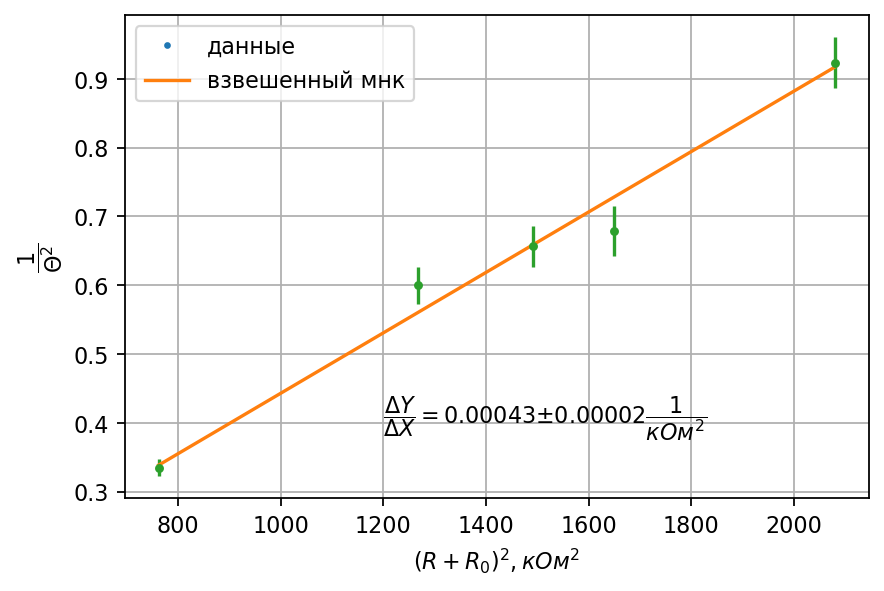

In [11]:
plt.plot(x_small, y_small, 'o', markersize=2, label='данные')
plt.plot(x_small, line(x_small, *popt), label='взвешенный мнк')
plt.errorbar(x_small, y_small, xerr=0, yerr=sigma_small, fmt='o', markersize=3)
plt.grid()
plt.legend()
plt.ylabel(r'$\dfrac{1}{\Theta^2}$')
plt.xlabel(r'$(R + R_0)^2, кОм^2$')
print('k = '+ str(popt[0]) +' +_ ' + str(np.sqrt(pcov[0][0])))

R_crit = (1/(2 * np.pi)*np.sqrt(1/popt[0]) * 1000 - R_0)
eps_crit = 1/2 * np.sqrt(pcov[0][0]) / popt[0]
delta_R_crit = eps_crit * R_crit
plt.text(1200, 0.4, r'$\dfrac{\Delta Y}{\Delta X} = $' + '0.00043' + r'$\pm 0.00002 \dfrac{1}{кОм^2}$')

print('R_crit = ' + str(R_crit) + ' +_ ' + str(delta_R_crit))

plt.savefig('plot3.png')

# В Баллистический режим

[144.68475033   7.56294327]
[[0.86928683 0.24519152]
 [0.24519152 0.08811111]]
R_crit = 7.6168494721338815 +_ 0.14962399460221665


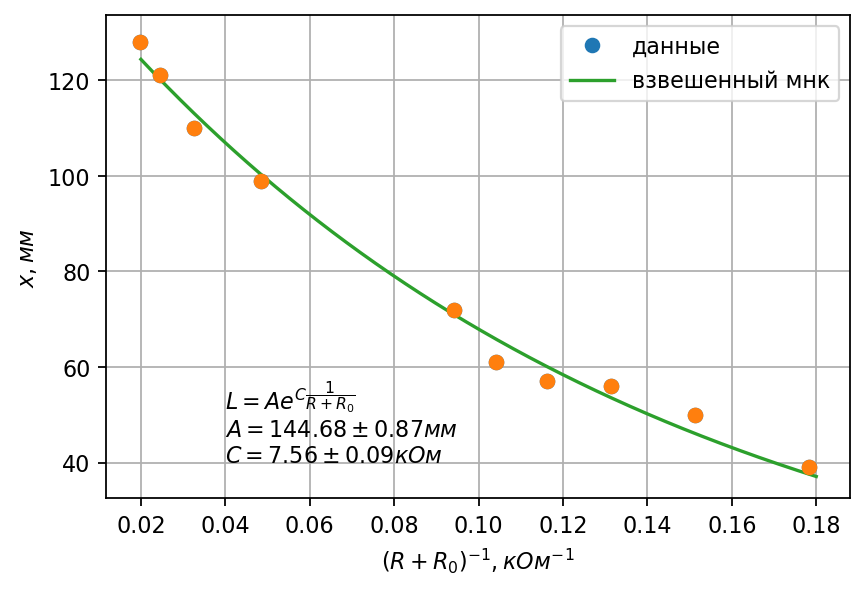

In [27]:
def exp(arr, A, C):
    return A*np.exp(-np.absolute(C)*arr)

l_max = 160 ##mm
l_max *= np.exp(sum(theta_0)/len(theta_0)/4 - 1)

x = np.array([128, 121, 110, 99, 72, 61, 57, 56, 50, 39], dtype=np.float64)
R = np.array([50, 40, 30, 20, 10, 9, 8, 7, 6, 5], dtype=np.float64)
R *= 1000
R1_R2 = 1/30
C = 2064.7 * 1e-9
a = 1.36

plt.plot(1/(R + R_0)*1000, x, 'o', label='данные')
plt.ylabel(r'$x, мм$')
plt.xlabel(r'$(R + R_0)^{-1}, кОм^{-1}$')
plt.grid()
plt.errorbar(1/(R + R_0)*1000, x, xerr=0, yerr=1, fmt='o')
x_aux = np.linspace(0.02, 0.18, 1000)
popt, pcov = curve_fit(exp, 1/(R + R_0)*1000, x, sigma=x / x, absolute_sigma=True)
plt.plot(x_aux, exp(x_aux, *popt), label='взвешенный мнк')
plt.legend()
plt.text(0.04, 40,r'$L = Ae^{C\dfrac{1}{R+R_0}}$'+'\n'+r'$A = 144.68 \pm 0.87 мм$'+'\n'+r'$C = 7.56 \pm 0.09 кОм$')

print(popt)
print(np.sqrt(pcov))

delta_R_crit = (popt[1] + np.sqrt(pcov[1][1])) / np.log((popt[0]-np.sqrt(pcov[0][0]))/57.7) - (popt[1] - np.sqrt(pcov[1][1])) / np.log((popt[0]+np.sqrt(pcov[0][0]))/57.7)

print('R_crit =', popt[1] / np.log(popt[0]/57.7) - R_0/1000, '+_', delta_R_crit/2)

plt.savefig('plot4.png')